# Comparing Bayes, Logistic, and KNN classifiers

There are a myriad of classifiers out there, each with their own use case and rationale for when to be employed. This script goes through the results of Naive Bayes, Logisitc, and KNN all on the same sample dataset so that their results can be directly compared to one another. 

Then, I performed PC to project the data into two-dimensional space so that I can plot the data points and decision boundary of each classifier and visually compare the results. 

I hope you enjoy this exploration into each models efficacy!

In [10]:
import numpy as np
import csv
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [11]:

raw = []
with open('../data/marriage.csv') as cf:
    readcsv = csv.reader(cf, delimiter=',')
    for row in readcsv:
        raw.append(row)
        
        data = np.array(raw).astype(np.float)
x = data[:, 0:-1]
y = data[:, -1]


# **Functions to Create the Models**

### *Logistic*

In [12]:
def Logistic(x,y):
    
    # split the data
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    ntest = len(y_test)
    
    # create logistic model with the training data
    lr = LogisticRegression(random_state=0).fit(X_train, y_train)

    # predict model on test set
    y_pred_lr = lr.predict(X_test)
    
    # gets accuracy 
    acc_test = sum(y_pred_lr==y_test)/ntest
    
    
    # creates confusion matrix of test results and displays accuracy 
    idx1 = np.where(y_test ==1) 
    idx2 = np.where(y_test ==2)
    cf_test_11 = np.sum(y_test[idx1] == y_pred_lr[idx1])
    cf_test_12 = np.sum(y_pred_lr[idx1] ==2)
    cf_test_22 = np.sum(y_test[idx2] == y_pred_lr[idx2])
    cf_test_21 = np.sum(y_pred_lr[idx2] ==1)


    print('~~~~~~~~~~~~~~~~~~~~~LR~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print('Accuracy: '+ str(round(acc_test, 4))+"\n")
    print('Confusion Matrix:')
    print('          predicted 1       predicted 2')
    print(f"true 1        {cf_test_11}                {cf_test_12}")
    print(f"true 2        {cf_test_21}                {cf_test_22}")
    print("\n")
    
    return acc_test



### *KNN*

In [13]:
def KNN(x,y):
    
    # split the data
    Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1)
    
    # create the KNN model with the training data
    clf = KNeighborsClassifier(n_neighbors = 3).fit(Xtrain, ytrain)

    # predict model on test set
    ypred_test = clf.predict(Xtest)
    
    # gets accuracy
    matched_test = ypred_test == ytest
    acc_test = sum(matched_test)/len(matched_test)

    # creates confusion matrix of test results and displays accuracy 
    idx1 = np.where(ytest ==1) 
    idx2 = np.where(ytest ==2)
    cf_test_11 = np.sum(ytest[idx1] == ypred_test[idx1])
    cf_test_12 = np.sum(ypred_test[idx1] ==2)
    cf_test_22 = np.sum(ytest[idx2] == ypred_test[idx2])
    cf_test_21 = np.sum(ypred_test[idx2] ==1)

    

    print('~~~~~~~~~~~~~~~~~~~~~KNN~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print('Accuracy: '+ str(round(acc_test, 4))+"\n")
    print('Confusion Matrix:')
    print('          predicted 1       predicted 2')
    print(f"true 1        {cf_test_11}                {cf_test_12}")
    print(f"true 2        {cf_test_21}                {cf_test_22}")
    print("\n")
    
    return acc_test



### *Naive Bayes*

In [14]:
def NaiveBayes(x,y):
    
    # split the data
    Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1)
    
    # create the Bayes model with the training data
    clf = GaussianNB(var_smoothing=1e-9,).fit(Xtrain, ytrain)

    # predict model on test set
    ypred_test = clf.predict(Xtest)
    
    # gets accuracy
    matched_test = ypred_test == ytest
    acc_test = sum(matched_test)/len(matched_test)

    # creates confusion matrix of test results and displays accuracy 
    idx1 = np.where(ytest ==1) 
    idx2 = np.where(ytest ==2)
    cf_test_11 = np.sum(ytest[idx1] == ypred_test[idx1])
    cf_test_12 = np.sum(ypred_test[idx1] ==2)
    cf_test_22 = np.sum(ytest[idx2] == ypred_test[idx2])
    cf_test_21 = np.sum(ypred_test[idx2] ==1)


    print('~~~~~~~~~~~~~~~~~~~~~BAYES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print('Accuracy: '+ str(round(acc_test, 4))+"\n")
    print('Confusion Matrix:')
    print('          predicted 1       predicted 2')
    print(f"true 1        {cf_test_11}                {cf_test_12}")
    print(f"true 2        {cf_test_21}                {cf_test_22}")
    print("\n")
    
    return acc_test



# Functions for PCA and Graph Plotting

### *PCA*

In [15]:
def pca2(x_):
    
    xc = (x_ - x_.mean(axis=0))
    u, s, _ = np.linalg.svd(xc.T @ xc /len(xc))
    xt = xc@u[:,0:2]@np.diag(s[0:2]**-1/2)
    
    return xt, u, s

### *Plotting of Boundaries*

In [16]:
def plot_decision_boundary(model, title, x_train, x_test, y_train):
    """
    Function used to plot the decision boundary. This will help viually compare the results of each model. 
    
    """
        
    h = 0.005
    cmap_light = ListedColormap(['#FFAAAA',  '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000',  '#0000FF'])

    x_min, x_max = x_train[:,0].min(), x_train[:,0].max() 
    y_min, y_max = x_train[:,1].min(), x_train[:,1].max()

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    # Also plot the training points
    plt.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)

## Finally, the main, to run the code

>>>>>>>>> Results Pre PCA <<<<<<<<<

~~~~~~~~~~~~~~~~~~~~~LR~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 0.9706

Confusion Matrix:
          predicted 1       predicted 2
true 1        20                0
true 2        0                0


~~~~~~~~~~~~~~~~~~~~~KNN~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 0.9412

Confusion Matrix:
          predicted 1       predicted 2
true 1        13                0
true 2        0                0


~~~~~~~~~~~~~~~~~~~~~BAYES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 0.9412

Confusion Matrix:
          predicted 1       predicted 2
true 1        13                0
true 2        0                0


>>>>>>>>> Results Post PCA <<<<<<<<<



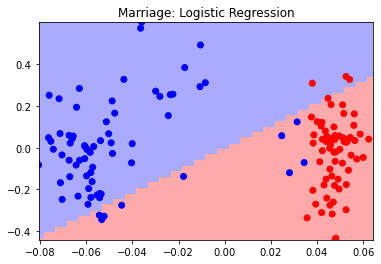

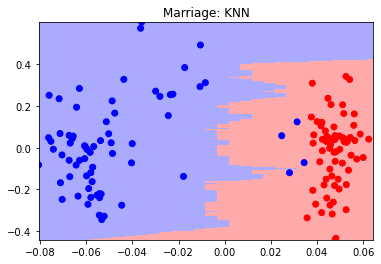

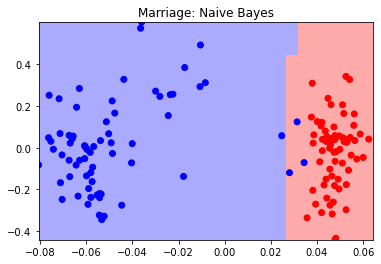

In [17]:

if __name__ == "__main__":
    
    print('>>>>>>>>> Results Pre PCA <<<<<<<<<\n')
    
    acc_lr = Logistic(x,y)
    acc_kn = KNN(x,y)
    acc_nb = NaiveBayes(x,y)

    print('>>>>>>>>> Results Post PCA <<<<<<<<<\n')
    # new test train split for PCA
    X_tr, X_te, y_train, y_test = train_test_split(x,y, test_size=0.2)
    X_train, u, s = pca2(X_tr)
    X_test = (X_te-X_tr.mean(axis=0))@ u[:, 0:2] @np.diag(s[0:2]**-1/2)
    
    
    # plot the decision boundary of each modes
    lr = LogisticRegression(random_state=0).fit(X_train, y_train)
    plot_decision_boundary(lr, 'Marriage: Logistic Regression',X_train, X_test, y_train)

    kn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
    plot_decision_boundary(kn, 'Marriage: KNN', X_train, X_test, y_train)
    
    nb = GaussianNB().fit(X_train, y_train)
    plot_decision_boundary(nb, 'Marriage: Naive Bayes', X_train, X_test, y_train)

    
    

# **Analysis**

This data set is rather small to distinguish large differences in the results of the accuracy; however, the the decision boundaries graph illuminates more information than the accuracy results. We can see here how each model forms its classifier boundaries in a robust manner. KNN appears to be more dynamic in nature, while Naive Bayes simply divides the classification in in a linear manner. This exploration is proof of concept to help me visually understand the behavior behind the underlining mathematics of each model. 